In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Walmart Sales Data

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week


#### Loading the data and setting the DateTimeIndex

In [128]:
data = pd.read_csv('dataset/train.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


#### Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.

In [129]:
store1 = data[data.Store == 1]
store1_weekly = pd.DataFrame(store1.Weekly_Sales.resample("W","sum"))
store1_weekly

,Weekly_Sales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68
2010-03-14,1439541.59
2010-03-21,1472515.79
2010-03-28,1404429.92
2010-04-04,1594968.28


#### Plot the rolling_mean for `Weekly_Sales`. What general trends do you observe?

In [130]:
store1_weekly["30dayavg"] = pd.rolling_mean(store1_weekly["Weekly_Sales"],30)
store1_weekly["15dayavg"] = pd.rolling_mean(store1_weekly["Weekly_Sales"],15)

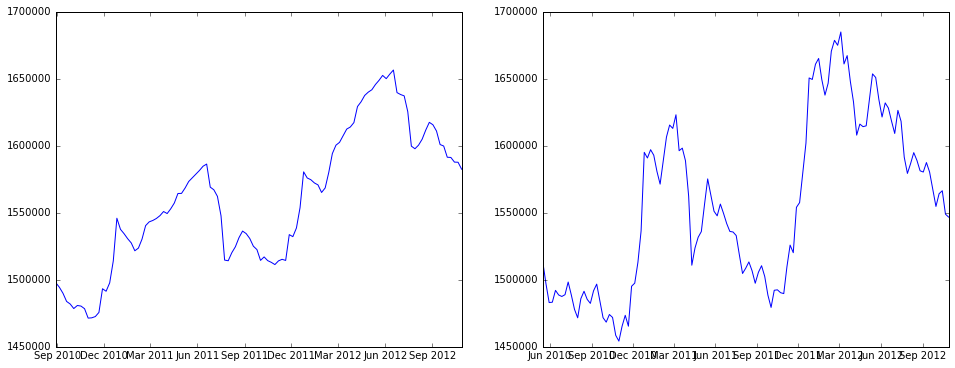

In [131]:
fig1, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
ax1.plot(store1_weekly["30dayavg"])
ax2.plot(store1_weekly["15dayavg"])

<font color="red">Sales are increasing and they tend to increase in the summer.</font>

#### Compute the 1, 2, 52 autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

In [132]:
auto_corr = [1,2,7,52]
for j in auto_corr:
    acorr = store1_weekly["Weekly_Sales"].autocorr(j)
    print("The autocorrelation for %i days is %f" % (j,acorr))

The autocorrelation for 1 days is 0.302158
The autocorrelation for 2 days is 0.127413
The autocorrelation for 7 days is 0.043880
The autocorrelation for 52 days is 0.895376


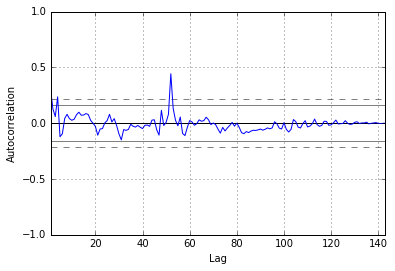

In [133]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(store1_weekly['Weekly_Sales'])

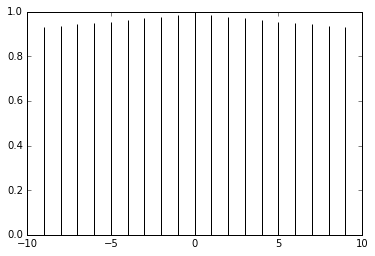

In [134]:
plt.acorr("Weekly_Sales",data=store1_weekly)
plt.show()

#### Split the weekly sales data in a training and test set - using 75% of the data for training

In [135]:
train_num = round(len(store1_weekly)*.75,0)
train_weekly = store1_weekly[0:108]
test_weekly = store1_weekly[109:]
print train_weekly.ix[0]
print train_weekly.ix[107]

Weekly_Sales    1643690.9
30dayavg              NaN
15dayavg              NaN
Name: 2010-02-07 00:00:00, dtype: float64
Weekly_Sales    1539387.830000
30dayavg        1600539.626333
15dayavg        1675144.300000
Name: 2012-02-26 00:00:00, dtype: float64


#### Create an AR(1) model on the training data and compute the mean absolute error of the predictions.

In [136]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [137]:
#We can use ARIMA and just model it without using d and q
train_model = sm.tsa.ARIMA(train_weekly["Weekly_Sales"],(1,0,0)).fit()

In [138]:
train_results = train_model.predict("2010-02-07","2012-02-26",dynamic=False)

In [139]:
print "Our mean absolute error is: ",mean_absolute_error(train_weekly["Weekly_Sales"],train_results)

Our mean absolute error is:  110475.388966


In [140]:
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  108
Model:                     ARMA(1, 0)   Log Likelihood               -1447.727
Method:                       css-mle   S.D. of innovations         160409.075
Date:                Thu, 10 Mar 2016   AIC                           2901.454
Time:                        21:35:07   BIC                           2909.500
Sample:                    02-07-2010   HQIC                          2904.716
                         - 02-26-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.544e+06   2.22e+04     69.636      0.000       1.5e+06  1.59e+06
ar.L1.Weekly_Sales     0.3066      0.091      3.363      0.001         0.128     0.485
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.2621           +0.0000j            3.2621            0.0000
-----------------------------------------------------------------------------
"""

#### Plot the residuals - where are their significant errors.

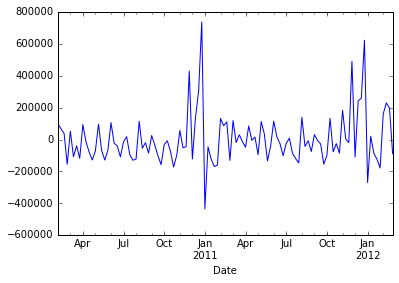

In [141]:
train_model.resid.plot()

#### Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set.

In [142]:
train_model2 = sm.tsa.ARIMA(train_weekly["Weekly_Sales"],(3,1,3)).fit()
train_results2 = train_model2.predict("2010-02-07","2012-02-26",dynamic=False)
print "Our mean absolute error is: ",mean_absolute_error(train_weekly["Weekly_Sales"],train_results2)
train_model2.summary()

/Users/MP/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ValueError: The start index -1 of the original series has been differenced away

In [ ]:
train_model2.resid.plot()

#### Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.

In [ ]:
plist = dlist = qlist = [1,2,3,4,5]

In [ ]:
def arima(p,d,q):
    train_modelprog = sm.tsa.ARIMA(train_weekly["Weekly_Sales"],(p,d,q)).fit()
    train_resultsprog = train_modelprog.predict("2010-02-07","2012-02-26",dynamic=False)
    a = mean_absolute_error(train_weekly["Weekly_Sales"],train_resultsprog)
    return a

In [ ]:
scores = []
for p in plist:
    for d in dlist:
        for q in qlist:
            score = arima(p,d,q)
            result = [p,d,q,score]
            scores.append(result)
print scores